<a href="https://colab.research.google.com/github/mostafa-ja/Let-s-build-an-LLM/blob/main/Let's_build_the_GPT_Tokenizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We are going to build the model based on karpathy's tutorial video [1 ](https://www.youtube.com/watch?v=zduSFxRajkE) and [2 ](https://www.youtube.com/watch?v=kCc8FmEb1nY)

Tokenizer for GPT [here ](https://tiktokenizer.vercel.app/)

More explanation also [here ](https://medium.com/@govindarajpriyanthan/build-and-train-gpt-4-tokenizer-from-scratch-ad90d3af0f11)






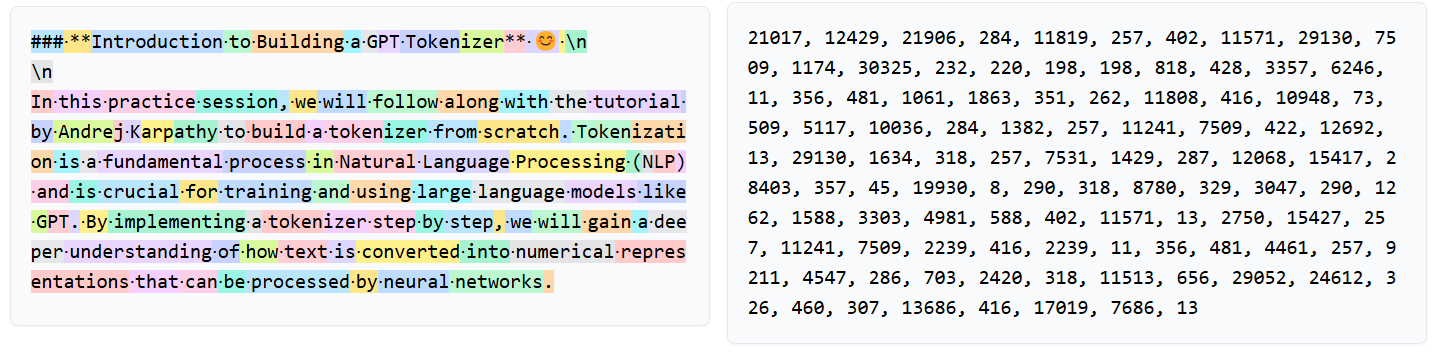


# **Introduction to Building a GPT Tokenizer** 😊

In this practice session, we will follow along with the tutorial by Andrej Karpathy to build a tokenizer from scratch. Tokenization is a fundamental process in Natural Language Processing (NLP) and is crucial for training and using large language models like GPT. By implementing a tokenizer step by step, we will gain a deeper understanding of how text is converted into numerical representations that can be processed by neural networks.  

Our goal is to build a simple but effective tokenizer using Byte Pair Encoding (BPE), which is a widely used subword tokenization technique. This method balances vocabulary size and model performance by iteratively merging the most frequent character pairs into new tokens.  

## **What We Will Learn**  
1. **Understanding Tokenization** – Why tokenization is necessary and how it affects NLP models.  
2. **Byte Pair Encoding (BPE) Basics** – The core idea behind BPE and why it is effective for NLP tasks.  
3. **Implementing BPE Step by Step** – Following Karpathy’s tutorial to implement BPE in Python.  
4. **Encoding and Decoding** – How to encode text into token sequences and decode them back.  
5. **Practical Considerations** – Optimizing tokenization for different applications and languages.  

By the end of this practice, you will have a working tokenizer and a solid understanding of its inner workings, preparing you for more advanced NLP tasks. Let’s dive in!  


## **Why Do We Need Tokenization?**  

Tokenization is essential in NLP because models process numbers, not raw text. It converts text into smaller units (tokens) that can be efficiently handled by machine learning algorithms.  

#### **Different Tokenization Methods:**  
1. **Word-Based Tokenization** – Splits text into words (e.g., "I’m happy" → ["I’m", "happy"]).  
   - ❌ **Issue:** Leads to a large vocabulary and struggles with unseen words (OOV problem).  
2. **Character-Based Tokenization** – Treats each character as a token (e.g., "hello" → ["h", "e", "l", "l", "o"]).  
   - ❌ **Issue:** Requires longer sequences, making learning context difficult.  
3. **Subword Tokenization (e.g., BPE, WordPiece, Unigram)** – Breaks words into frequent subunits (e.g., "happiness" → ["happi", "ness"]).  
   - ✅ **Advantage:** Balances vocabulary size, handles rare words well, and retains word structure.  



####**Tokenization Strategies in Modern Language Models:**

* **GPT (Generative Pre-trained Transformer) Family (OpenAI):**
    * Primarily employs **Byte Pair Encoding (BPE)**. BPE iteratively merges the most frequent byte or character pairs in the training data, creating a vocabulary of subword units. This allows GPT models to efficiently handle both common and rare words, including those not seen during training.
* **BERT (Bidirectional Encoder Representations from Transformers) (Google):**
    * Utilizes **WordPiece tokenization**, a subword tokenization algorithm similar to BPE. WordPiece optimizes for data likelihood, merging subword units that maximize the probability of the training data. This helps BERT models to effectively represent and process diverse text.
* **Contemporary Large Language Models (LLMs) (GPT-4, Gemini, Claude, etc.):**
    * These advanced models often leverage refined versions of **BPE** or **Unigram Language Model** based tokenization. These modern approaches are designed to:
        * **Enhance Vocabulary Coverage:** Better handling of diverse languages and specialized domains.
        * **Improve Computational Efficiency:** Reducing the length of token sequences and optimizing processing.
        * **Minimize Out-of-Vocabulary (OOV) Issues:** Effectively representing rare or unseen words.
        * **SentencePiece:** Some of these modern LLMs, especially those designed to be multilingual, utilize SentencePiece. SentencePiece allows for language agnostic training, and can use either BPE or unigram algorithms.


#### **What is Unigram Tokenization?**  

A Unigram Language Model is a simple statistical model that calculates the probability of a word based on its frequency in training data, assuming words are independent of each other. In tokenization, it helps determine the most probable way to break text into tokens.

# Import data

In [1]:
# Let's download the tiny shakespeare dataset
!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

--2025-03-22 10:48:33--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt’

input.txt           100%[===================>]   1.06M  4.13MB/s    in 0.3s    

2025-03-22 10:48:34 (4.13 MB/s) - ‘input.txt’ saved [1115394/1115394]



In [2]:
# read it in to inspect it
with open('input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

print("length of dataset in characters: ", len(text))

length of dataset in characters:  1115394


In [4]:
# let's look at the first 200 characters
print(text[:200])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you


# Tokenization(character level)

In [10]:
# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)


 !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
65


In [22]:
# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

print(encode("hii there"))
print(decode(encode("hii there")))

[46, 47, 47, 1, 58, 46, 43, 56, 43]
hii there


In [26]:
# let's now encode the entire text dataset and store it into a torch.Tensor
import torch
data = torch.tensor(encode(text), dtype=torch.long)  # torch.long is an alias for torch.int64
print(data.shape, data.dtype)
print(data[:100]) # the 1000 characters we looked at earier will to the GPT look like this

torch.Size([1115394]) torch.int64
tensor([18, 47, 56, 57, 58,  1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 14, 43, 44,
        53, 56, 43,  1, 61, 43,  1, 54, 56, 53, 41, 43, 43, 42,  1, 39, 52, 63,
         1, 44, 59, 56, 58, 46, 43, 56,  6,  1, 46, 43, 39, 56,  1, 51, 43,  1,
        57, 54, 43, 39, 49,  8,  0,  0, 13, 50, 50, 10,  0, 31, 54, 43, 39, 49,
         6,  1, 57, 54, 43, 39, 49,  8,  0,  0, 18, 47, 56, 57, 58,  1, 15, 47,
        58, 47, 64, 43, 52, 10,  0, 37, 53, 59])


In [27]:
# Let's now split up the data into train and validation sets
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

In [33]:
block_size = 8
print(train_data[:block_size+1])

x = train_data[:block_size]
y = train_data[1:block_size+1]
for t in range(block_size):
    context = x[:t+1]
    target = y[t]
    print(f"when input is {context} the target: {target}")

tensor([18, 47, 56, 57, 58,  1, 15, 47, 58])
when input is tensor([18]) the target: 47
when input is tensor([18, 47]) the target: 56
when input is tensor([18, 47, 56]) the target: 57
when input is tensor([18, 47, 56, 57]) the target: 58
when input is tensor([18, 47, 56, 57, 58]) the target: 1
when input is tensor([18, 47, 56, 57, 58,  1]) the target: 15
when input is tensor([18, 47, 56, 57, 58,  1, 15]) the target: 47
when input is tensor([18, 47, 56, 57, 58,  1, 15, 47]) the target: 58


Both `torch.stack` and `torch.cat` are used to combine tensors in PyTorch, but they behave differently:

### **1. `torch.stack`**
- Combines tensors along a **new** dimension.
- The tensors must have the same shape.
- The resulting tensor has one additional dimension.

#### **Example:**
```python
import torch

a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])

stacked = torch.stack([a, b], dim=0)
print(stacked)
print(stacked.shape)  # torch.Size([2, 3])
```
**Output:**
```
tensor([[1, 2, 3],
        [4, 5, 6]])
torch.Size([2, 3])  # New dimension is added
```

---
### **2. `torch.cat`**
- Concatenates tensors along an **existing** dimension.
- The tensors must have matching shapes **except in the concatenation dimension**.

#### **Example:**
```python
concatenated = torch.cat([a, b], dim=0)
print(concatenated)
print(concatenated.shape)  # torch.Size([6])
```
**Output:**
```
tensor([1, 2, 3, 4, 5, 6])
torch.Size([6])  # No new dimension added
```

### **3. `Equivalant of stack`**

#### **Example:**
```python
concatenated = torch.cat([a.unsqueeze(0), b.unsqueeze(0)], dim=0)
print(concatenated)
print(concatenated.shape)
```
**Output:**
```
tensor([[1, 2, 3],
        [4, 5, 6]])
torch.Size([2, 3])
```



---
### **Key Differences**
| Feature       | `torch.stack`          | `torch.cat`            |
|--------------|----------------------|----------------------|
| **Effect**   | Adds a new dimension  | Joins along existing dimension |
| **Shapes**   | Must be identical     | Must match in all but concat dimension |
| **Resulting Shape** | Has one extra dimension | Keeps same number of dimensions |
| **Example Shape Change** | `(3,) → (2, 3)` | `(3,) + (3,) → (6,)` |

---

- Use **`torch.stack`** when you want to group tensors together and need an additional dimension (e.g., batching).


In [39]:
torch.manual_seed(1337)
batch_size = 4 # how many independent sequences will we process in parallel?
block_size = 8 # what is the maximum context length for predictions?

def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    return x, y

xb, yb = get_batch('train')
print('inputs:')
print(xb.shape)
print(xb)
print('targets:')
print(yb.shape)
print(yb)

inputs:
torch.Size([4, 8])
tensor([[24, 43, 58,  5, 57,  1, 46, 43],
        [44, 53, 56,  1, 58, 46, 39, 58],
        [52, 58,  1, 58, 46, 39, 58,  1],
        [25, 17, 27, 10,  0, 21,  1, 54]])
targets:
torch.Size([4, 8])
tensor([[43, 58,  5, 57,  1, 46, 43, 39],
        [53, 56,  1, 58, 46, 39, 58,  1],
        [58,  1, 58, 46, 39, 58,  1, 46],
        [17, 27, 10,  0, 21,  1, 54, 39]])


In [40]:
for b in range(batch_size): # batch dimension
    for t in range(block_size): # time dimension
        context = xb[b, :t+1]
        target = yb[b,t]
        print(f"when input is {context.tolist()} the target: {target}")

when input is [24] the target: 43
when input is [24, 43] the target: 58
when input is [24, 43, 58] the target: 5
when input is [24, 43, 58, 5] the target: 57
when input is [24, 43, 58, 5, 57] the target: 1
when input is [24, 43, 58, 5, 57, 1] the target: 46
when input is [24, 43, 58, 5, 57, 1, 46] the target: 43
when input is [24, 43, 58, 5, 57, 1, 46, 43] the target: 39
when input is [44] the target: 53
when input is [44, 53] the target: 56
when input is [44, 53, 56] the target: 1
when input is [44, 53, 56, 1] the target: 58
when input is [44, 53, 56, 1, 58] the target: 46
when input is [44, 53, 56, 1, 58, 46] the target: 39
when input is [44, 53, 56, 1, 58, 46, 39] the target: 58
when input is [44, 53, 56, 1, 58, 46, 39, 58] the target: 1
when input is [52] the target: 58
when input is [52, 58] the target: 1
when input is [52, 58, 1] the target: 58
when input is [52, 58, 1, 58] the target: 46
when input is [52, 58, 1, 58, 46] the target: 39
when input is [52, 58, 1, 58, 46, 39] the t

In [41]:
import torch

a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])

stacked = torch.stack([a, b], dim=0)
print(stacked)
print(stacked.shape)  # torch.Size([2, 3])

tensor([[1, 2, 3],
        [4, 5, 6]])
torch.Size([2, 3])


In [43]:
import torch

a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])

stacked = torch.cat([a, b], dim=0)
print(stacked)
print(stacked.shape)  # torch.Size([2, 3])

stacked = torch.cat([a.unsqueeze(0), b.unsqueeze(0)], dim=0)
print(stacked)
print(stacked.shape)  # torch.Size([2, 3])

tensor([1, 2, 3, 4, 5, 6])
torch.Size([6])
tensor([[1, 2, 3],
        [4, 5, 6]])
torch.Size([2, 3])
